# Image Classification
In this project, you'll classify images from the [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html).  The dataset consists of airplanes, dogs, cats, and other objects. You'll preprocess the images, then train a convolutional neural network on all the samples. The images need to be normalized and the labels need to be one-hot encoded.  You'll get to apply what you learned and build a convolutional, max pooling, dropout, and fully connected layers.  At the end, you'll get to see your neural network's predictions on the sample images.
## Get the Data
Run the following cell to download the [CIFAR-10 dataset for python](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz).

In [3]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
from urllib.request import urlretrieve
from os.path import isfile, isdir
from tqdm import tqdm
import problem_unittests as tests
import tarfile

cifar10_dataset_folder_path = 'cifar-10-batches-py'

class DLProgress(tqdm):
    last_block = 0

    def hook(self, block_num=1, block_size=1, total_size=None):
        self.total = total_size
        self.update((block_num - self.last_block) * block_size)
        self.last_block = block_num

if not isfile('cifar-10-python.tar.gz'):
    with DLProgress(unit='B', unit_scale=True, miniters=1, desc='CIFAR-10 Dataset') as pbar:
        urlretrieve(
            'https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz',
            'cifar-10-python.tar.gz',
            pbar.hook)

if not isdir(cifar10_dataset_folder_path):
    with tarfile.open('cifar-10-python.tar.gz') as tar:
        tar.extractall()
        tar.close()


tests.test_folder_path(cifar10_dataset_folder_path)

All files found!


## Explore the Data
The dataset is broken into batches to prevent your machine from running out of memory.  The CIFAR-10 dataset consists of 5 batches, named `data_batch_1`, `data_batch_2`, etc.. Each batch contains the labels and images that are one of the following:
* airplane
* automobile
* bird
* cat
* deer
* dog
* frog
* horse
* ship
* truck

Understanding a dataset is part of making predictions on the data.  Play around with the code cell below by changing the `batch_id` and `sample_id`. The `batch_id` is the id for a batch (1-5). The `sample_id` is the id for a image and label pair in the batch.




Stats of batch 3:
Samples: 10000
Label Counts: {0: 994, 1: 1042, 2: 965, 3: 997, 4: 990, 5: 1029, 6: 978, 7: 1015, 8: 961, 9: 1029}
First 20 Labels: [8, 5, 0, 6, 9, 2, 8, 3, 6, 2, 7, 4, 6, 9, 0, 0, 7, 3, 7, 2]

Example of Image 0:
Image - Min Value: 0 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship


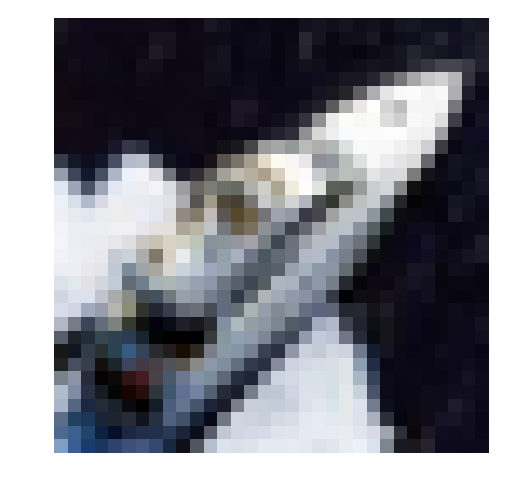

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper
import numpy as np

# Explore the dataset
batch_id = 3
sample_id = 0
helper.display_stats(cifar10_dataset_folder_path, batch_id, sample_id)

## Implement Preprocess Functions
### Normalize
In the cell below, implement the `normalize` function to take in image data, `x`, and return it as a normalized Numpy array. The values should be in the range of 0 to 1, inclusive.  The return object should be the same shape as `x`.

In [5]:
def normalize(x):

    """
    Normalize a list of sample image data in the range of 0 to 1
    : x: List of image data.  The image shape is (32, 32, 3)
    : return: Numpy array of normalize data
    """
    # TODO: Implement Function.nomarlize 不在乎正负号，因为可以还原。本身就是个array(None，32, 32, 3)
    #x:[batch,32,32,3]     
    return ((x-128.0)/128.0+1.0)/2.0
    print( x.shape)
    #return x/255


tests.test_normalize(normalize)

Tests Passed


### One-hot encode


In [6]:
LabelMap=[]
def one_hot_encode(x):
    """
    One hot encode a list of sample labels. Return a one-hot encoded vector for each label.
    : x: List of sample Labels
    : return: Numpy array of one-hot encoded labels
     
    """
    # TODO: Implement Function 
    
    if len(LabelMap)==0:
        for i in x:
            if i not in LabelMap:
                LabelMap.append(i)
            LabelMap.sort()
        
              
    LabelList=[]
    #also could use np.eye(10)[x]
    for i in x:
        ListTemp=[0]*len(LabelMap)
        ListTemp[LabelMap.index(i)]=1
        LabelList.append(ListTemp)    
        
    return np.array(LabelList)



tests.test_one_hot_encode(one_hot_encode)

Tests Passed


## Preprocess all the data and save it
Running the code cell below will preprocess all the CIFAR-10 data and save it to file. The code below also uses 10% of the training data for validation.

In [7]:

# Preprocess Training, Validation, and Testing Data
helper.preprocess_and_save_data(cifar10_dataset_folder_path, normalize, one_hot_encode)

In [8]:

import pickle
import problem_unittests as tests
import helper

# Load the Preprocessed Validation data
valid_features, valid_labels = pickle.load(open('preprocess_validation.p', mode='rb'))

## Build the network
 

In [9]:
import tensorflow as tf

def neural_net_image_input(image_shape):
    """
    Return a Tensor for a batch of image input
    : image_shape: Shape of the images
    : return: Tensor for image input.
    """
    # TODO: Implement Function
 
    return tf.placeholder(tf.float32,shape=(None,image_shape[0],image_shape[1],image_shape[2]),name='x')


def neural_net_label_input(n_classes):
    """
    Return a Tensor for a batch of label input
    : n_classes: Number of classes
    : return: Tensor for label input.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,shape=(None,n_classes),name='y')


def neural_net_keep_prob_input():
    """
    Return a Tensor for keep probability
    : return: Tensor for keep probability.
    """
    # TODO: Implement Function
    return tf.placeholder(tf.float32,name='keep_prob')



tf.reset_default_graph()
tests.test_nn_image_inputs(neural_net_image_input)
tests.test_nn_label_inputs(neural_net_label_input)
tests.test_nn_keep_prob_inputs(neural_net_keep_prob_input)

Image Input Tests Passed.
Label Input Tests Passed.
Keep Prob Tests Passed.


### Convolution and Max Pooling Layer


In [11]:
def conv2d_maxpool(x_tensor, conv_num_outputs, conv_ksize, conv_strides, pool_ksize, pool_strides):
    """
    Apply convolution then max pooling to x_tensor
    :param x_tensor: TensorFlow Tensor 4维
    :param conv_num_outputs: Number of outputs for the convolutional layer
    :param conv_ksize: kernal size 2-D Tuple for the convolutional layer
    :param conv_strides: Stride 2-D Tuple for convolution
    :param pool_ksize: kernal size 2-D Tuple for pool
    :param pool_strides: Stride 2-D Tuple for pool
    : return: A tensor that represents convolution and max pooling of x_tensor
    """
    # TODO: Implement Function
    #Max-Pooling -> ReLU ；tf.truncated_normal；tf.zeros
   
    wc=tf.Variable(tf.truncated_normal([conv_ksize[0],conv_ksize[1],x_tensor.get_shape().as_list()[3],conv_num_outputs],stddev=0.05))
   
    bc=tf.Variable(tf.zeros([conv_num_outputs]))
    conv=tf.nn.conv2d(x_tensor,wc,strides=[1,conv_strides[0],conv_strides[1],1],padding='SAME')
    conv=tf.nn.bias_add(conv,bc)
    pool=tf.nn.max_pool(conv,ksize=[1,pool_ksize[0],pool_ksize[1],1],strides=[1,pool_strides[0],pool_strides[1],1],padding='SAME')
    pool=tf.nn.relu(pool)
    return pool 
   
 
    print(x_tensor.get_shape())

tests.test_con_pool(conv2d_maxpool)

Tests Passed


### Flatten Layer


In [12]:
def flatten(x_tensor):
    """
    Flatten x_tensor to (Batch Size, Flattened Image Size)
    : x_tensor: A tensor of size (Batch Size, ...), where ... are the image dimensions.
    batchsize是none！！！！
    : return: A tensor of size (Batch Size, Flattened Image Size).
    """
    # TODO: Implement Function
  
    return tf.reshape(x_tensor,[-1,(x_tensor.get_shape().as_list()[1])*(x_tensor.get_shape().as_list()[2])*(x_tensor.get_shape().as_list()[3])])



tests.test_flatten(flatten)

Tests Passed


### Fully-Connected Layer


In [13]:
def fully_conn(x_tensor, num_outputs):
    """
    Apply a fully connected layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
    # TODO: Implement Function
    wf=tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1],num_outputs],stddev=0.05))
    wb=tf.Variable(tf.zeros([num_outputs]))
    fc=tf.add(tf.matmul(x_tensor,wf),wb)
    fc=tf.nn.relu(fc)
    return fc


tests.test_fully_conn(fully_conn)

Tests Passed


### Output Layer


In [15]:
def output(x_tensor, num_outputs):
    """
    Apply a output layer to x_tensor using weight and bias
    : x_tensor: A 2-D tensor where the first dimension is batch size.
    : num_outputs: The number of output that the new tensor should be.
    : return: A 2-D tensor where the second dimension is num_outputs.
    """
  
    ow=tf.Variable(tf.truncated_normal([x_tensor.get_shape().as_list()[1],num_outputs],stddev=0.05))
    ob=tf.Variable(tf.zeros([num_outputs]))
    logit=tf.add(tf.matmul(x_tensor,ow),ob)
    return logit
   



tests.test_output(output)

Tests Passed


### Create Convolutional Model


In [16]:
def conv_net(x, keep_prob):
    
    """
    Create a convolutional neural network model
    : x: Placeholder tensor that holds image data.
    : keep_prob: Placeholder tensor that hold dropout keep probability.
    : return: Tensor that represents logits
    """

    # TODO: Apply 1, 2, or 3 Convolution and Max Pool layers
    #   Play around with different number of outputs, kernel size and stride
    # Function Definition from Above:
    l1_conv_ksize=(5,5)
    l1_conv_strides=(2,2)  
    l2_conv_ksize=(4,4)
    l2_conv_strides=(2,2)  
    l3_conv_ksize=(3,3)
    l3_conv_strides=(2,2)
    pool_ksize=(2,2)
    pool_strides=(2,2)
    cl=conv2d_maxpool(x, 32, l1_conv_ksize, l1_conv_strides, pool_ksize, pool_strides)
    cl=conv2d_maxpool(cl, 64, l2_conv_ksize, l2_conv_strides, pool_ksize, pool_strides)
    cl=conv2d_maxpool(cl, 128, l3_conv_ksize, l3_conv_strides, pool_ksize, pool_strides)
    # TODO: Apply a Flatten Layer
    # Function Definition from Above:
    #   flatten(x_tensor)
   
    cl_2d=flatten(cl)

    # TODO: Apply 1, 2, or 3 Fully Connected Layers
    #    Play around with different number of outputs
    # Function Definition from Above:
    
    fl=fully_conn(cl_2d, 512)
    fl=fully_conn(fl, 128)
    fl=tf.nn.dropout(fl,keep_prob)
    
    # TODO: Apply an Output Layer
    #    Set this to the number of classes
    # Function Definition from Above:
    logit=output(fl, 10)
    
    
    # TODO: return output
    return logit




##############################
## Build the Neural Network ##
##############################

# Remove previous weights, bias, inputs, etc..
tf.reset_default_graph()

# Inputs
x = neural_net_image_input((32, 32, 3))
y = neural_net_label_input(10)
keep_prob = neural_net_keep_prob_input()

# Model
logits = conv_net(x, keep_prob)

# Name logits Tensor, so that is can be loaded from disk after training
logits = tf.identity(logits, name='logits')

# Loss and Optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y))
optimizer = tf.train.AdamOptimizer().minimize(cost)

# Accuracy
correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32), name='accuracy')

tests.test_conv_net(conv_net)

Neural Network Built!


## Train the Neural Network
### Single Optimization


In [21]:
def train_neural_network(session, optimizer, keep_probability, feature_batch, label_batch):
    """
    Optimize the session on a batch of images and labels
    : session: Current TensorFlow session
    : optimizer: TensorFlow optimizer function
    : keep_probability: keep probability
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    """
    # TODO: Implement Function
    print(type(feature_batch))
    
    session.run(optimizer,feed_dict={x:feature_batch,y:label_batch,keep_prob:keep_probability})
    pass


Y ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_train_nn(train_neural_network)

<class 'numpy.ndarray'>
Tests Passed


### Show Stats
Implement the function `print_stats` to print loss and validation accuracy.  Use the global variables `valid_features` and `valid_labels` to calculate validation accuracy.  Use a keep probability of `1.0` to calculate the loss and validation accuracy.

In [24]:
def print_stats(session, feature_batch, label_batch, cost, accuracy):
    """
    Print information about loss and validation accuracy
    : session: Current TensorFlow session
    : feature_batch: Batch of Numpy image data
    : label_batch: Batch of Numpy label data
    : cost: TensorFlow cost function
    : accuracy: TensorFlow accuracy function
    """
    
    cost=session.run(cost,feed_dict={x:feature_batch,y:label_batch,keep_prob:1.0})
    accuracy=session.run(accuracy,feed_dict={x:valid_features,y:valid_labels,keep_prob:1.0})
    print('loss:{},accuracy:{}'.format(cost,accuracy))
    pass

### Hyperparameters
Tune the following parameters:


In [15]:
# TODO: Tune Parameters
epochs = 15
batch_size = 64
keep_probability = 0.5

### Train on a Single CIFAR-10 Batch
Instead of training the neural network on all the CIFAR-10 batches of data, let's use a single batch. This should save time while you iterate on the model to get a better accuracy.  Once the final validation accuracy is 50% or greater, run the model on all the data in the next section.

In [16]:

print('Checking the Training on a Single Batch...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        batch_i = 1
        for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
            train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
        print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
        print_stats(sess, batch_features, batch_labels, cost, accuracy)

Checking the Training on a Single Batch...
Epoch  1, CIFAR-10 Batch 1:  loss:2.1385068893432617,accuracy:0.24560000002384186
Epoch  2, CIFAR-10 Batch 1:  loss:1.9455572366714478,accuracy:0.3393999934196472
Epoch  3, CIFAR-10 Batch 1:  loss:1.9037277698516846,accuracy:0.365200012922287
Epoch  4, CIFAR-10 Batch 1:  loss:1.7212908267974854,accuracy:0.4185999929904938
Epoch  5, CIFAR-10 Batch 1:  loss:1.67060124874115,accuracy:0.4291999936103821
Epoch  6, CIFAR-10 Batch 1:  loss:1.618233323097229,accuracy:0.43959999084472656
Epoch  7, CIFAR-10 Batch 1:  loss:1.5507729053497314,accuracy:0.44339999556541443
Epoch  8, CIFAR-10 Batch 1:  loss:1.423153281211853,accuracy:0.45260000228881836
Epoch  9, CIFAR-10 Batch 1:  loss:1.3759933710098267,accuracy:0.45399999618530273
Epoch 10, CIFAR-10 Batch 1:  loss:1.1517980098724365,accuracy:0.451200008392334
Epoch 11, CIFAR-10 Batch 1:  loss:1.0329959392547607,accuracy:0.48399999737739563
Epoch 12, CIFAR-10 Batch 1:  loss:0.9069937467575073,accuracy:0.47

### Fully Train the Model
Now that you got a good accuracy with a single CIFAR-10 batch, try it with all five batches.

In [17]:

save_model_path = './image_classification'

print('Training...')
with tf.Session() as sess:
    # Initializing the variables
    sess.run(tf.global_variables_initializer())
    
    # Training cycle
    for epoch in range(epochs):
        # Loop over all batches
        n_batches = 5
        for batch_i in range(1, n_batches + 1):
            for batch_features, batch_labels in helper.load_preprocess_training_batch(batch_i, batch_size):
                train_neural_network(sess, optimizer, keep_probability, batch_features, batch_labels)
            print('Epoch {:>2}, CIFAR-10 Batch {}:  '.format(epoch + 1, batch_i), end='')
            print_stats(sess, batch_features, batch_labels, cost, accuracy)
            
    # Save Model
    saver = tf.train.Saver()
    save_path = saver.save(sess, save_model_path)

Training...
Epoch  1, CIFAR-10 Batch 1:  loss:2.1762325763702393,accuracy:0.28380000591278076
Epoch  1, CIFAR-10 Batch 2:  loss:1.8745968341827393,accuracy:0.3357999920845032
Epoch  1, CIFAR-10 Batch 3:  loss:1.3956221342086792,accuracy:0.397599995136261
Epoch  1, CIFAR-10 Batch 4:  loss:1.6609169244766235,accuracy:0.4259999990463257
Epoch  1, CIFAR-10 Batch 5:  loss:1.6030174493789673,accuracy:0.45559999346733093
Epoch  2, CIFAR-10 Batch 1:  loss:1.8339160680770874,accuracy:0.45080000162124634
Epoch  2, CIFAR-10 Batch 2:  loss:1.4576808214187622,accuracy:0.4652000069618225
Epoch  2, CIFAR-10 Batch 3:  loss:1.1234941482543945,accuracy:0.46540001034736633
Epoch  2, CIFAR-10 Batch 4:  loss:1.3304297924041748,accuracy:0.4864000082015991
Epoch  2, CIFAR-10 Batch 5:  loss:1.367701768875122,accuracy:0.5189999938011169
Epoch  3, CIFAR-10 Batch 1:  loss:1.4963874816894531,accuracy:0.5113999843597412
Epoch  3, CIFAR-10 Batch 2:  loss:1.2677648067474365,accuracy:0.5175999999046326
Epoch  3, CIFA

# Checkpoint
The model has been saved to disk.
## Test Model
Test your model against the test dataset.  This will be your final accuracy. You should have an accuracy greater than 50%. If you don't, keep tweaking the model architecture and parameters.

INFO:tensorflow:Restoring parameters from ./image_classification
Testing Accuracy: 0.632265127388535



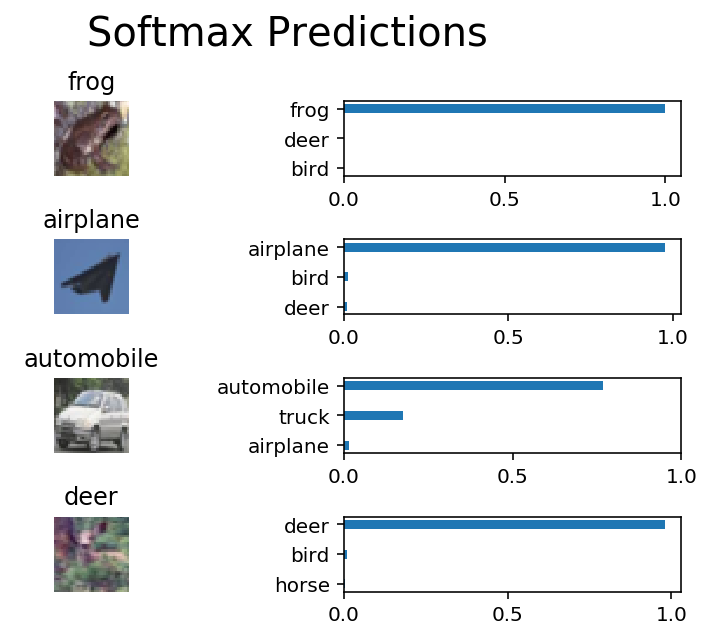

In [18]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import tensorflow as tf
import pickle
import helper
import random

# Set batch size if not already set
try:
    if batch_size:
        pass
except NameError:
    batch_size = 64

save_model_path = './image_classification'
n_samples = 4
top_n_predictions = 3

def test_model():
    """
    Test the saved model against the test dataset
    """

    test_features, test_labels = pickle.load(open('preprocess_training.p', mode='rb'))
    loaded_graph = tf.Graph()

    with tf.Session(graph=loaded_graph) as sess:
        # Load model
        loader = tf.train.import_meta_graph(save_model_path + '.meta')
        loader.restore(sess, save_model_path)

        # Get Tensors from loaded model
        loaded_x = loaded_graph.get_tensor_by_name('x:0')
        loaded_y = loaded_graph.get_tensor_by_name('y:0')
        loaded_keep_prob = loaded_graph.get_tensor_by_name('keep_prob:0')
        loaded_logits = loaded_graph.get_tensor_by_name('logits:0')
        loaded_acc = loaded_graph.get_tensor_by_name('accuracy:0')
        
        # Get accuracy in batches for memory limitations
        test_batch_acc_total = 0
        test_batch_count = 0
        
        for train_feature_batch, train_label_batch in helper.batch_features_labels(test_features, test_labels, batch_size):
            test_batch_acc_total += sess.run(
                loaded_acc,
                feed_dict={loaded_x: train_feature_batch, loaded_y: train_label_batch, loaded_keep_prob: 1.0})
            test_batch_count += 1

        print('Testing Accuracy: {}\n'.format(test_batch_acc_total/test_batch_count))

        # Print Random Samples
        random_test_features, random_test_labels = tuple(zip(*random.sample(list(zip(test_features, test_labels)), n_samples)))
        random_test_predictions = sess.run(
            tf.nn.top_k(tf.nn.softmax(loaded_logits), top_n_predictions),
            feed_dict={loaded_x: random_test_features, loaded_y: random_test_labels, loaded_keep_prob: 1.0})
        helper.display_image_predictions(random_test_features, random_test_labels, random_test_predictions)


test_model()